# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [2]:
dataframe = pd.read_csv(r"data/reviews_sentiment.csv", sep=";")
dataframe.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [4]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [5]:
dataframe.describe   

<bound method NDFrame.describe of                    Review Title  \
0                  Sin conexión   
1                  faltan cosas   
2    Es muy buena lo recomiendo   
3               Version antigua   
4                     Esta bien   
..                          ...   
252        Muy buena aplicacion   
253                       Buena   
254                        Wuau   
255                   Muy buena   
256                       Sg S5   

                                           Review Text  wordcount  \
0    Hola desde hace algo más de un mes me pone sin...         23   
1                   Han mejorado la apariencia pero no         20   
2                                 Andres e puto amoooo          4   
3    Me gustana mas la version anterior esta es mas...         17   
4                      Sin ser la biblia.... Esta bien          6   
..                                                 ...        ...   
252                                   Muy buena genial        

In [8]:
dataframe.isnull().sum()    


Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64

array([[<AxesSubplot: title={'center': 'wordcount'}>,
        <AxesSubplot: title={'center': 'Star Rating'}>],
       [<AxesSubplot: title={'center': 'sentimentValue'}>,
        <AxesSubplot: >]], dtype=object)

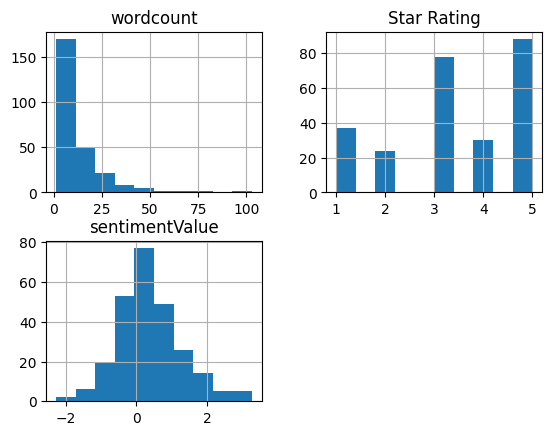

In [13]:
dataframe.hist()

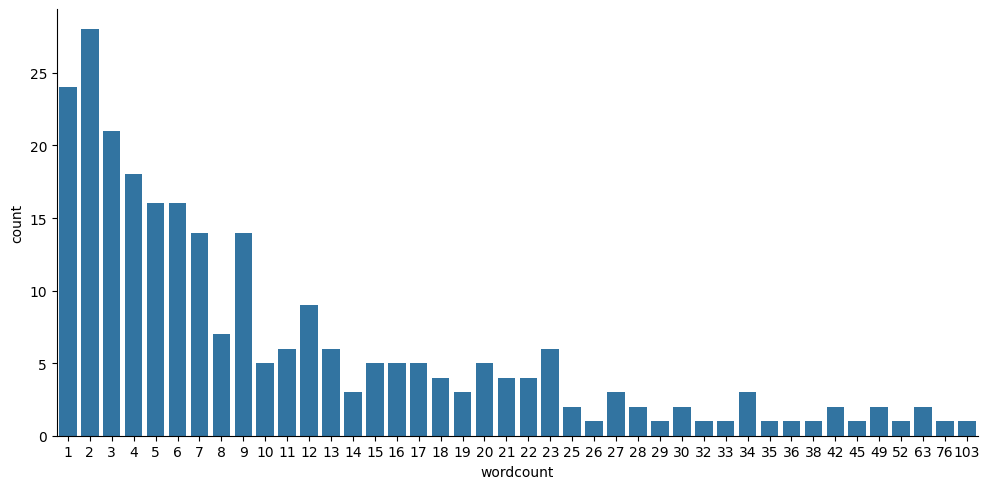

In [22]:
import seaborn as sns
sns.catplot(data=dataframe, x="wordcount", kind="count",aspect=2)

"""
seaborn catplot showing the distribution of wordcount.

Parameters:
- data (DataFrame)
- x (str): The column name /x-axis.
- kind (str): The type of plot -'count' for a countplot.
- aspect (int): Aspect ratio .
"""



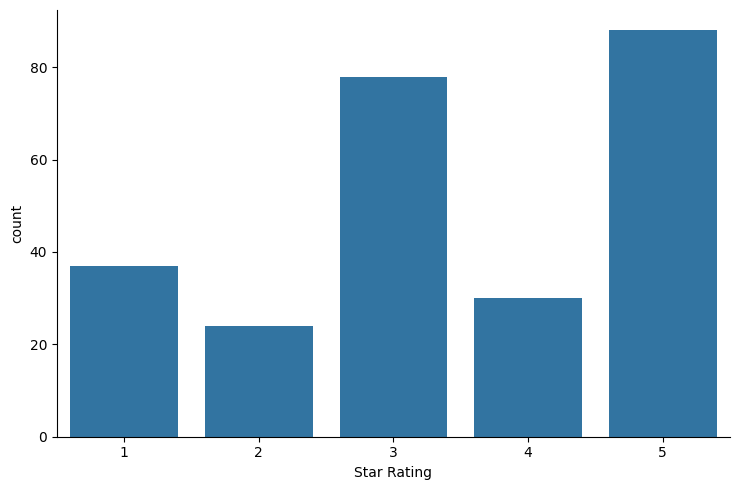

In [28]:
sns.catplot(data=dataframe, x="Star Rating", kind="count",aspect=1.5,height=5)

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:

# Split the data into training and test sets using train_test_split.
# X contains the features 'wordcount' and 'sentimentValue'.
# y contains the target variable 'Star Rating'.


X = dataframe[['wordcount', 'sentimentValue']].values
y = dataframe['Star Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

* MinMaxScaler is used to rescale all the features in the data to a range of 0 to 1. 

* This helps ensure that features with larger ranges do not dominate features with smaller ranges.

* The outputs are the scaled training data X_train and scaled test data X_test.

* Normalizing the data improves the performance and accuracy of a machine learning model. Feature scaling puts all features on the same scale and range, **preventing issues with domination of variables and improving convergence of optimization algorithms.**

* Standardizes the inputs so the model can **learn patterns from the normalized data rather than focusing on magnitude.** This is an important data preprocessing step for many machine learning algorithms.

In [43]:
# normalize the input data to 0 and 1 before training and testing. 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

 * **KNeighborsClassifier** It looks at the "neighbors" or other data points who are most similar, and uses those neighbors to make a prediction.

* When we create the KNeighborsClassifier, we have to tell it **how many "neighbors" to look at - that's the n_neighbors variable.** If we set it to 1, it will look at the data point itself to make a prediction. If we set it to 5, it will look at the 5 data points closest to it to make a prediction.

 * **.fit()** to train the classifier.


In [47]:

from sklearn.neighbors import KNeighborsClassifier



**.score()** evaluates a model's predictions compared to true values
It takes X and y data as input
It runs predict() on the X input
Compares predicted y vs true y
Calculates an accuracy percentage
* Returns the accuracy score (float between 0 and 1)<br>
* **A high accuracy score indicates the model is performing well and making accurate predictions**. A low score means the model is not predicting the labels well and needs improvement.

In [83]:
# Accuracy score of a KNearestNeighbors model (train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train).round(2)


0.91

In [81]:
# Accuracy score of a KNearestNeighbors model (text)
knn.score(X_test, y_test).round(2)



0.85

## Resultados obtenidos

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
# Predict the response for test dataset knn.predict(X_test)
pred = knn.predict(X_test)


In [85]:
''' Classification report for the predicted labels 
compared  to the true labels:
 precision, recall, f1-score, and 
# support for each class. ''' 

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       0.89      0.80      0.84        10
           5       0.95      0.80      0.87        25

    accuracy                           0.85        65
   macro avg       0.81      0.88      0.82        65
weighted avg       0.87      0.85      0.85        65



**Precision**- The model is very precise/accurate when predicting class 1.

**Recall**- The model was able to correctly identify 90% of the actual class 1 examples. So it has good coverage/recall of class 1, but missed 10%.

**F1-score**- Combines precision and recall into one metric. Class 1 has a high F1 score of 0.95, meaning it has both high precision and high recall.

**Support** - The number of examples for each class. Class 1 has 10 examples.

**Accuracy** - Overall, the model predicted the correct class 85% of the time across all classes.

**Macro average** - Averages the metric across all classes. Gives equal weight to each class.

**Weighted average** - Takes class imbalance into account by averaging based on support/number of examples per class.



**Class 1** has high precision, recall and F1. The model performs very well on this class.

**Class 2** has low precision but perfect recall. It struggles to predict this class but finds the only example.

**Class 3** has decent scores - model performs fairly on this class but still misses some.

**Class 4** has high precision but lower recall than other classes. When it predicts class 4 it's usually correct but it misses some examples.

**Class 5** has high precision but slightly lower recall. Still performs well overall.

* The model struggles most with class 2, but overall has good performance, with 85% accuracy across all classes.





In [67]:
# Confusion matrix comparing the true labels (y_test) to the predicted labels (pred).
# The confusion matrix shows the number of correct and incorrect predictions for each class.
# This gives a more detailed breakdown of accuracy than just the overall accuracy score.

print(confusion_matrix(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]


* The diagonal numbers are much higher than the off-diagonals. This means the model is usually correct in its predictions.

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

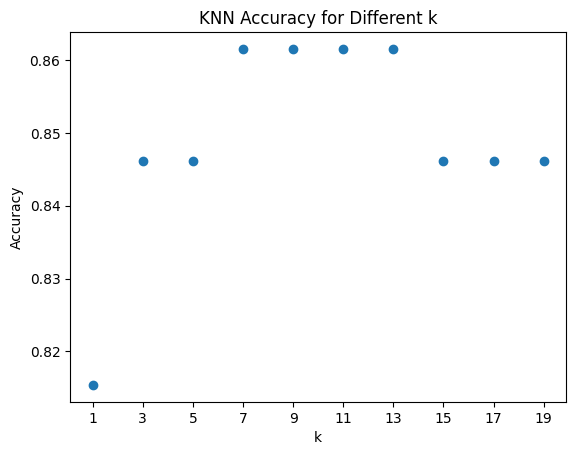

In [94]:
"""
The range() generates the sequence.
 argument 1: indicates the start of the range.
   The second argument 20 indicates the end of the range (exclusive). 
   The third argument 2 indicates the step size, so it will increment by 2 each step to produce only odd numbers.
"""


k_range = range(1, 20, 2)
"""
Calculates accuracy scores over a range of k values,
in order to determine the optimal k for a KNN classifier.
"""

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    scores.append(knn.score(X_test, y_test))

plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k')
plt.xticks(k_range)

plt.show()


## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [95]:
# wordcount(5)/sentimenVallue(1.0)
new_review = scaler.transform([[5, 1.0]]) 
clf.predict(new_review) 

array([3])

In [97]:
# predict_proba method of the clf variable makes predictions from the KNearestNeighbor model.
clf.predict_proba(scaler.transform([[5,1.0]]))

array([[0. , 0. , 0.5, 0. , 0.5]])

In [104]:
"""
Fits a KNN classifier on the training data and
 predicts the class labels for the test data.
Predicts the class labels
 for the new data points in 
 new_review using the fitted model.


"""

knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train, y_train)
knn.predict(new_review)


array([5])

In [105]:
# predicts the class probabilities for each data point in new_review.
knn.predict_proba(new_review)

array([[0., 0., 0., 0., 1.]])